# vggNet

On our laboratory classes we used two new type of models - first one was vggNet in TenserFlow.

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

X_train /= 255
X_valid /= 255

n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

11490434/11490434 [==============================] - 0s 0us/step


The main difference in this model is that it's a deep model - in contains multiple layers (in complex situations number of layers can be over 19-20). Thanks to this, vggnet model is one of the most popular in image recognition.

In [4]:
model_vgg = Sequential()

model_vgg.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model_vgg.add(Conv2D(64, 3, activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(2, 2))
model_vgg.add(BatchNormalization())

model_vgg.add(Conv2D(128, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(128, 3, activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(2, 2))
model_vgg.add(BatchNormalization())

model_vgg.add(Conv2D(256, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(256, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(256, 3, activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(2, 2))
model_vgg.add(BatchNormalization())

model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(2, 1)) # default stride is 2
model_vgg.add(BatchNormalization())

model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(Conv2D(512, 3, activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(2, 1)) # default stride is 2
model_vgg.add(BatchNormalization())

model_vgg.add(Flatten())
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))

model_vgg.add(Dense(10, activation='softmax'))

We were introduced to new tool that helps in understanding models we create - plot model. Thanks to that, we see a drawing of how model look like and it's easier to understand how it works.

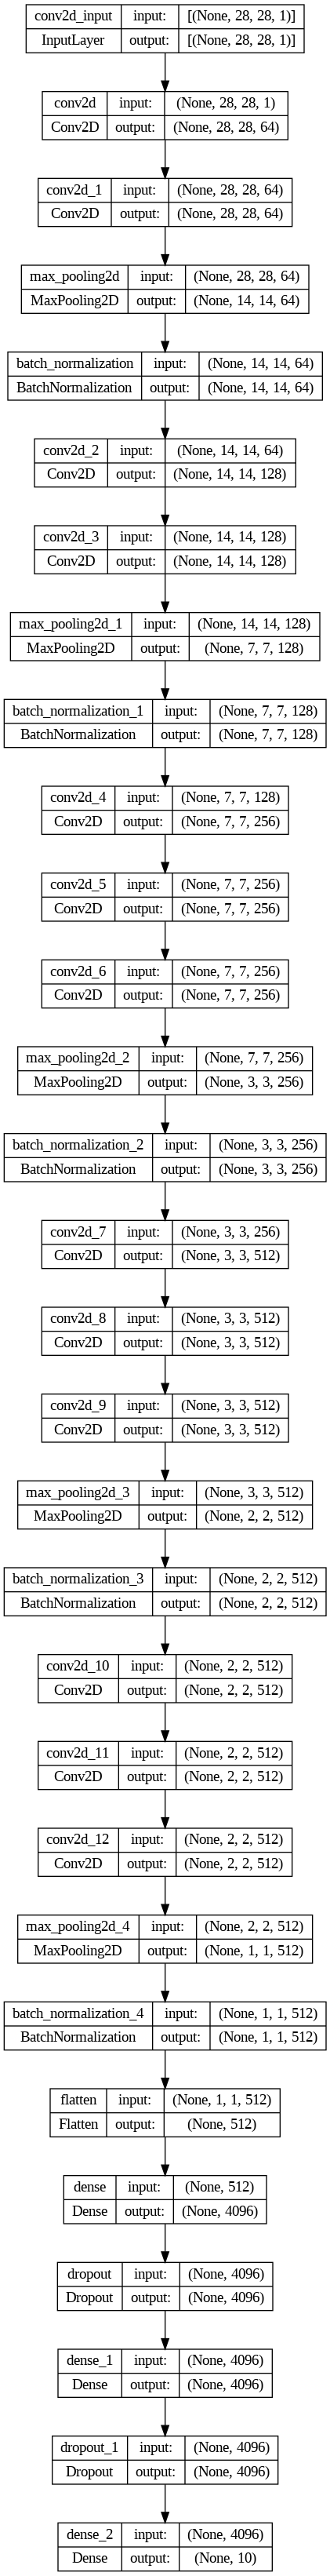

In [6]:
tensorflow.keras.utils.plot_model(model_vgg, show_shapes=True)

In [7]:
model_vgg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [13]:
model_vgg.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

 63/469 [===>..........................] - ETA: 1:15:53 - loss: 0.1403 - accuracy: 0.9609

KeyboardInterrupt: ignored

As we can see, the perforance is really good. Maybe using this model on MNIST dataset is something called overgrowth, but we can see how it works. Due to complexity of this model training itself is really long.

# AlexNet

The second model we get to learn is AlexNet in TenserFlow. This is also a deep model, but it is designed with lower number of layers - 8, with 5 convolutional layers and 3 fully connected layers (in our case those numbers were lower). 

In [14]:
model_alex = Sequential()

# first conv-pool block: 
model_alex.add(Conv2D(96, kernel_size=(11, 11), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model_alex.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_alex.add(BatchNormalization())

# second conv-pool block: 
model_alex.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_alex.add(BatchNormalization())

# third conv-pool block: 
model_alex.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_alex.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_alex.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_alex.add(BatchNormalization())

# dense layers: 
model_alex.add(Flatten())
model_alex.add(Dense(4096, activation='tanh'))
model_alex.add(Dropout(0.5))
model_alex.add(Dense(4096, activation='tanh'))
model_alex.add(Dropout(0.5))

# output layer: 
model_alex.add(Dense(10, activation='softmax'))

In this case we can do same thing we did earlier - draw a plot of a model (it really helps)

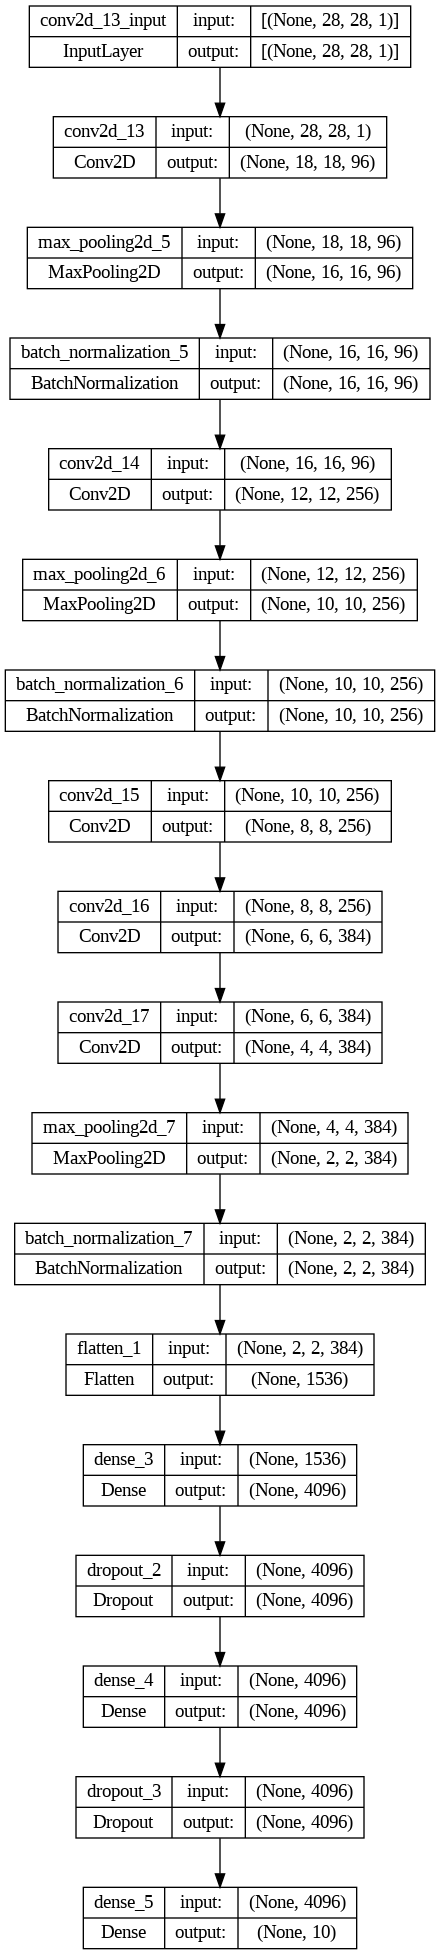

In [15]:
tensorflow.keras.utils.plot_model(model_alex, show_shapes=True)

In [16]:
model_alex.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
model_alex.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

170/469 [=========>....................] - ETA: 23:54 - loss: 0.5972 - accuracy: 0.8994

KeyboardInterrupt: ignored

# Fashion Dataset
At the end of labolatory we were introduced to Fashion Dataset - these are pictures of clothes and the task for model is to categorize it. This is dataset that thanks to it we can truly see what deep models could do.

In [ ]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

We can see some of the pictures:

In [ ]:
for i in range(1, 10):
   
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
     
    # Insert ith image with the color map 'grap'
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

Now we can create model (AlexNet) to work on this dataset.

In [ ]:
model_fash = Sequential()

# first conv-pool block: 
model_fash.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model_fash.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_fash.add(BatchNormalization())

# second conv-pool block: 
model_fash.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model_fash.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_fash.add(BatchNormalization())

# third conv-pool block: 
model_fash.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_fash.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_fash.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model_fash.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model_fash.add(BatchNormalization())

# dense layers: 
model_fash.add(Flatten())
model_fash.add(Dense(4096, activation='tanh'))
model_fash.add(Dropout(0.5))
model_fash.add(Dense(4096, activation='tanh'))
model_fash.add(Dropout(0.5))

# output layer: 
model_fash.add(Dense(10, activation='softmax'))

In [ ]:
model_fash.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model_fash.fit(train_images, train_labels, batch_size=64, epochs=5, verbose=1, validation_data=(valid_images, valid_labels))

# Conclusion

At this laboratory we learned more about deep models (which were a lot complicated than previous ones, had troubles trying to understand whats going on). We also get to know a new dataset and some tools like drawing a model. All of these can really get us known to deep learning.